In [143]:
import os
import numpy as np
from scipy.fftpack import dct
from scipy.signal import cwt
from pywt import dwt2
from skimage.io import imread, imshow
from skimage.measure import shannon_entropy
import matplotlib.pyplot as plt
from IPython import display

from utils import (
    SoftThresh,
    ShrinkageOperator,
    Proj
)

%matplotlib inline

## Import an image to compress and reconstruct

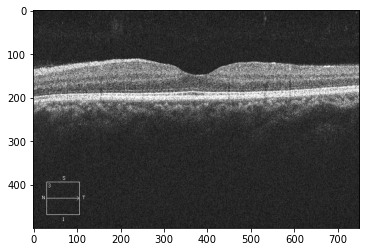

In [29]:
image_path = "OCTID_NORMAL"
image_name = "NORMAL1.jpeg"
image = os.path.join(image_path, image_name)

oct_image = imread(image)
plt.imshow(oct_image, cmap='gray')

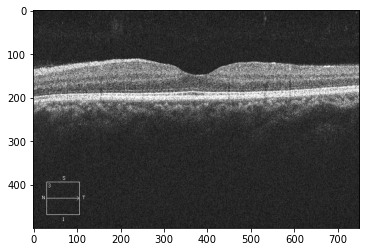

In [30]:
# Taking the first of the 3 channels, as they are all the same.
X = oct_image[:,:,0]
plt.imshow(oct_image, cmap='gray')

## Create a random mask (this is our projection operator $\mathcal{P}_{\Omega}$)

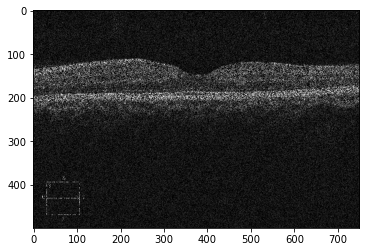

In [35]:
compression_factor = 2
h, w = X.shape
mask = np.random.randint(2, size=(h,w))
D = X*mask
plt.imshow(X*mask, cmap="gray")

# Set up our initial variables for the $\ell_{1}$ norm minimization problem

W is the variable that we are trying to optimize with repect to. W is used as the weights for our chosen basis vectors, and we seek to enforce that $\mathcal{P}_{\Omega}(B_{1} W B_{2}^{\mathbf{T}}) \approx \mathcal{P}_{\Omega}(X)$, and that we have either $\text{rank}(W) \leq k$m for some small value of $k$, or that $\lVert W \rVert_{0}$ is small, or both. (We want matrix $W$ to be sparse/lowrank). 

### set basis = 'dct' to use discrete cosine basis or to "wavelet" to use a wavelet basis.

In [144]:
basis_ = "dwt"

if basis_ == "dct":
    B1 = dct(np.eye(h), norm='ortho', axis=0).T
    B2t = dct(np.eye(w), norm='ortho', axis=0)
else: 
    # pywt.dwt2 is the discrete wavelet transform in 2D. It returns the transformed array
    # in 4 equaly sized block matrices which are simplpy regions of the entire 2D transform
    (cA, (cH, cV, cD)) = dwt2(np.eye(h), 'db1')
    upper = np.concatenate([cA, cH])
    lower = np.concatenate([cV, cD])
    B1 = np.concatenate([upper, lower], axis=1)
    
    (cA, (cH, cV, cD)) = dwt2(np.eye(w), 'db1')
    upper = np.concatenate([cA, cH])
    lower = np.concatenate([cV, cD])
    B2t = np.concatenate([upper, lower], axis=1)

B1 = basis(np.eye(h), norm='ortho', axis=0).T
B2t = basis(np.eye(w), norm='ortho', axis=0)
D = X*mask
W = np.linalg.inv(B1) @ D @ np.linalg.inv(B2t)

tau = 3.5
a = 2

In [145]:
def Update1(mask, B1, B2t, W, D, a):
    # Minimize the error with respect to constraint P_{\Omega}(B1 @ W @ B2t) == P_{\Omega}
    Z = Proj(B1 @ W @ B2t, mask) - D
    Z = B1.T @ Z @ B2t.T
    return W - a*Z

Iteration 1:	Reconstruction Error: 33406.63	Spectral Norm W: 442020.20	Sparisty of W: 83786.87
Resulting Reconstruction after 0 interations:


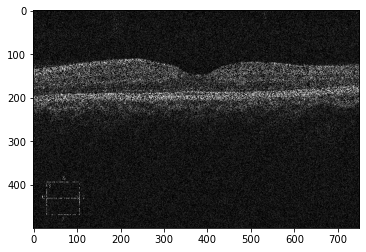

Iteration 51:	Reconstruction Error: 31687.15	Spectral Norm W: 407218.82	Sparisty of W: 84994.94
Iteration 101:	Reconstruction Error: 30083.45	Spectral Norm W: 376096.94	Sparisty of W: 86232.72
Iteration 151:	Reconstruction Error: 28592.88	Spectral Norm W: 349447.72	Sparisty of W: 87543.85
Iteration 201:	Reconstruction Error: 27207.93	Spectral Norm W: 326850.06	Sparisty of W: 88925.67
Iteration 251:	Reconstruction Error: 25921.13	Spectral Norm W: 307702.10	Sparisty of W: 90385.44
Resulting Reconstruction after 250 interations:


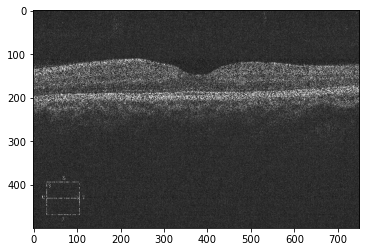

Iteration 301:	Reconstruction Error: 24724.09	Spectral Norm W: 291538.83	Sparisty of W: 91892.77
Iteration 351:	Reconstruction Error: 23607.85	Spectral Norm W: 277929.84	Sparisty of W: 93481.63
Iteration 401:	Reconstruction Error: 22563.10	Spectral Norm W: 266458.68	Sparisty of W: 95149.60
Iteration 451:	Reconstruction Error: 21581.06	Spectral Norm W: 256722.65	Sparisty of W: 96892.53
Iteration 501:	Reconstruction Error: 20654.07	Spectral Norm W: 248364.21	Sparisty of W: 98716.77
Resulting Reconstruction after 500 interations:


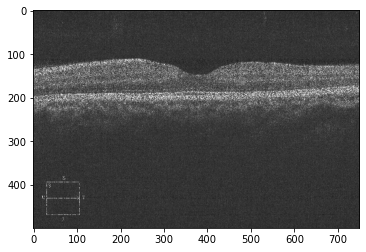

Iteration 551:	Reconstruction Error: 19775.87	Spectral Norm W: 241085.59	Sparisty of W: 100609.17
Iteration 601:	Reconstruction Error: 18941.84	Spectral Norm W: 234657.11	Sparisty of W: 102568.37
Iteration 651:	Reconstruction Error: 18148.69	Spectral Norm W: 228913.26	Sparisty of W: 104557.41
Iteration 701:	Reconstruction Error: 17394.14	Spectral Norm W: 223739.39	Sparisty of W: 106566.78
Iteration 751:	Reconstruction Error: 16676.61	Spectral Norm W: 219049.82	Sparisty of W: 108581.29
Resulting Reconstruction after 750 interations:


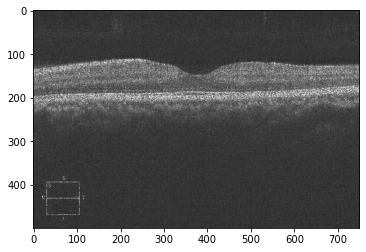

Iteration 801:	Reconstruction Error: 15995.04	Spectral Norm W: 214785.99	Sparisty of W: 110586.13
Iteration 851:	Reconstruction Error: 15348.61	Spectral Norm W: 210902.25	Sparisty of W: 112565.25
Iteration 901:	Reconstruction Error: 14736.66	Spectral Norm W: 207363.61	Sparisty of W: 114514.03
Iteration 951:	Reconstruction Error: 14158.59	Spectral Norm W: 204140.45	Sparisty of W: 116417.79
Iteration 1001:	Reconstruction Error: 13613.80	Spectral Norm W: 201208.19	Sparisty of W: 118277.02
Resulting Reconstruction after 1000 interations:


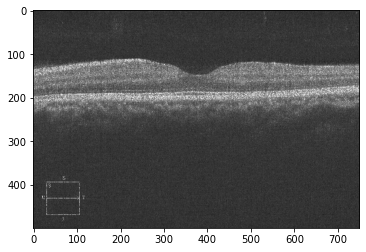

Iteration 1051:	Reconstruction Error: 13101.66	Spectral Norm W: 198544.48	Sparisty of W: 120089.63
Iteration 1101:	Reconstruction Error: 12621.49	Spectral Norm W: 196129.25	Sparisty of W: 121852.05
Iteration 1151:	Reconstruction Error: 12172.54	Spectral Norm W: 193943.53	Sparisty of W: 123563.41
Iteration 1201:	Reconstruction Error: 11753.98	Spectral Norm W: 191970.00	Sparisty of W: 125218.82
Iteration 1251:	Reconstruction Error: 11364.95	Spectral Norm W: 190191.56	Sparisty of W: 126821.25
Resulting Reconstruction after 1250 interations:


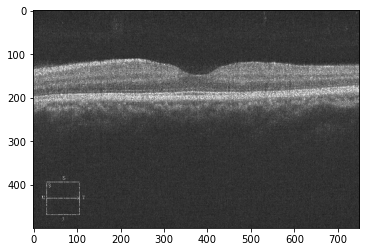

Iteration 1301:	Reconstruction Error: 11004.47	Spectral Norm W: 188593.10	Sparisty of W: 128370.20
Iteration 1351:	Reconstruction Error: 10671.53	Spectral Norm W: 187159.37	Sparisty of W: 129862.07
Iteration 1401:	Reconstruction Error: 10365.02	Spectral Norm W: 185876.74	Sparisty of W: 131303.96
Iteration 1451:	Reconstruction Error: 10083.78	Spectral Norm W: 184732.15	Sparisty of W: 132688.57
Iteration 1501:	Reconstruction Error: 9826.58	Spectral Norm W: 183712.83	Sparisty of W: 134014.77
Resulting Reconstruction after 1500 interations:


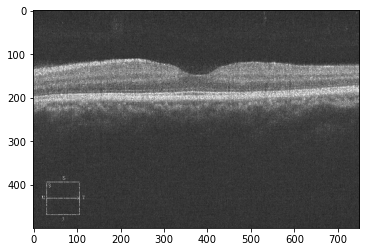

Iteration 1551:	Reconstruction Error: 9592.17	Spectral Norm W: 182807.61	Sparisty of W: 135281.33
Iteration 1601:	Reconstruction Error: 9379.23	Spectral Norm W: 182006.04	Sparisty of W: 136485.71
Iteration 1651:	Reconstruction Error: 9186.44	Spectral Norm W: 181297.86	Sparisty of W: 137626.23
Iteration 1701:	Reconstruction Error: 9012.46	Spectral Norm W: 180674.16	Sparisty of W: 138710.01
Iteration 1751:	Reconstruction Error: 8855.94	Spectral Norm W: 180126.55	Sparisty of W: 139735.66
Resulting Reconstruction after 1750 interations:


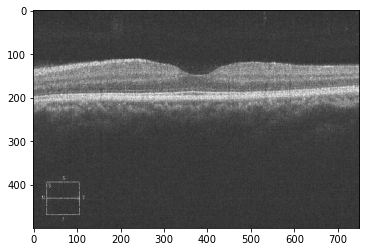

Iteration 1801:	Reconstruction Error: 8715.55	Spectral Norm W: 179647.02	Sparisty of W: 140701.75
Iteration 1851:	Reconstruction Error: 8589.97	Spectral Norm W: 179228.69	Sparisty of W: 141605.83
Iteration 1901:	Reconstruction Error: 8477.93	Spectral Norm W: 178864.80	Sparisty of W: 142452.90
Iteration 1951:	Reconstruction Error: 8378.20	Spectral Norm W: 178549.17	Sparisty of W: 143249.76
Iteration 2001:	Reconstruction Error: 8289.61	Spectral Norm W: 178276.33	Sparisty of W: 143995.26
Resulting Reconstruction after 2000 interations:


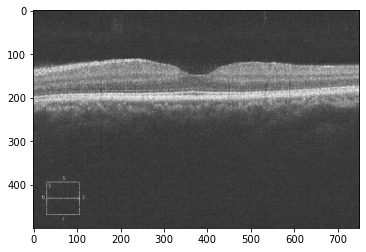

Iteration 2051:	Reconstruction Error: 8211.05	Spectral Norm W: 178041.21	Sparisty of W: 144689.74
Iteration 2101:	Reconstruction Error: 8141.49	Spectral Norm W: 177839.20	Sparisty of W: 145333.88
Iteration 2151:	Reconstruction Error: 8079.96	Spectral Norm W: 177666.11	Sparisty of W: 145926.45
Iteration 2201:	Reconstruction Error: 8025.58	Spectral Norm W: 177518.19	Sparisty of W: 146471.91
Iteration 2251:	Reconstruction Error: 7977.53	Spectral Norm W: 177392.25	Sparisty of W: 146971.87
Resulting Reconstruction after 2250 interations:


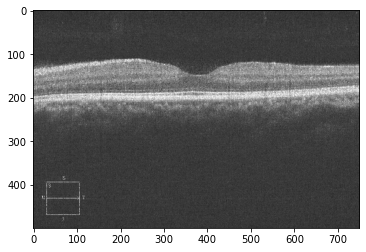

Iteration 2301:	Reconstruction Error: 7935.07	Spectral Norm W: 177284.98	Sparisty of W: 147428.30
Iteration 2351:	Reconstruction Error: 7897.55	Spectral Norm W: 177193.82	Sparisty of W: 147844.79
Iteration 2401:	Reconstruction Error: 7864.39	Spectral Norm W: 177116.48	Sparisty of W: 148224.90
Iteration 2451:	Reconstruction Error: 7835.05	Spectral Norm W: 177050.96	Sparisty of W: 148571.78
Iteration 2501:	Reconstruction Error: 7809.07	Spectral Norm W: 176995.50	Sparisty of W: 148889.15
Resulting Reconstruction after 2500 interations:


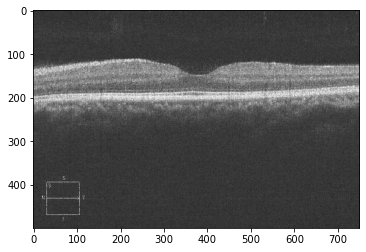

Iteration 2551:	Reconstruction Error: 7786.05	Spectral Norm W: 176948.59	Sparisty of W: 149177.94
Iteration 2601:	Reconstruction Error: 7765.62	Spectral Norm W: 176908.96	Sparisty of W: 149441.63
Iteration 2651:	Reconstruction Error: 7747.47	Spectral Norm W: 176875.56	Sparisty of W: 149682.04
Iteration 2701:	Reconstruction Error: 7731.32	Spectral Norm W: 176847.31	Sparisty of W: 149901.55
Iteration 2751:	Reconstruction Error: 7716.93	Spectral Norm W: 176823.48	Sparisty of W: 150101.99
Resulting Reconstruction after 2750 interations:


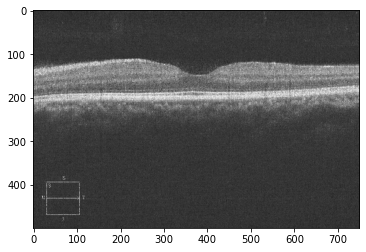

Iteration 2801:	Reconstruction Error: 7704.10	Spectral Norm W: 176803.39	Sparisty of W: 150284.84
Iteration 2851:	Reconstruction Error: 7692.63	Spectral Norm W: 176786.46	Sparisty of W: 150452.00
Iteration 2901:	Reconstruction Error: 7682.37	Spectral Norm W: 176772.22	Sparisty of W: 150605.35
Iteration 2951:	Reconstruction Error: 7673.18	Spectral Norm W: 176760.33	Sparisty of W: 150745.68


 Final Reconstruction


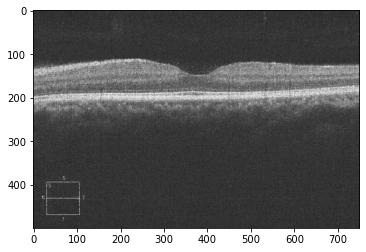

In [146]:
basis_ = "dwt"

reconstruction_error = []
spectral_norm = []
sparsity = []

iters = 3000
for i in range(iters):
    W = Update1(mask, B1, B2t, W, D, a)
    W = ShrinkageOperator(W, tau)
    
    spectral_norm.append(np.linalg.norm(W, ord="nuc"))
    sparsity.append(np.linalg.norm(W, ord=1))
    reconstruction_error.append(np.linalg.norm(X - B1 @ W @ B2t))
    if i % 50 == 0:
        print(
            f"Iteration {i+1}:\t"\
            f"Reconstruction Error: {reconstruction_error[-1]:.2f}\t"\
            f"Spectral Norm W: {spectral_norm[-1]:.2f}\t"\
            f"Sparisty of W: {sparsity[-1]:.2f}"
        )
    if i % 250 == 0:
        print(f"Resulting Reconstruction after {i} interations:")
        plt.imshow(B1 @ W @ B2t, cmap="gray")
        display.display(plt.gcf())
        
print("\n\n Final Reconstruction")
plt.imshow(B1 @ W @ B2t, cmap="gray");

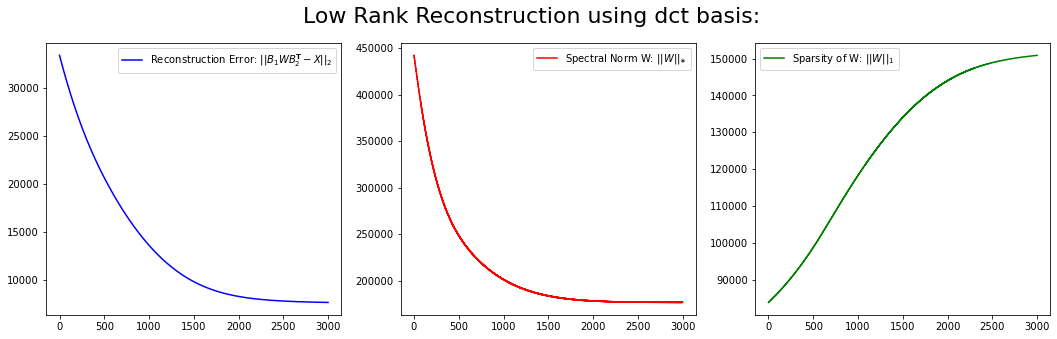

In [168]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

axes[0].plot(reconstruction_error, c='b', label=r"Reconstruction Error: $||B_{1} W B_{2}^{\mathbf{T}} - X ||_{2}$")
axes[1].plot(spectral_norm, c='r', label=r"Spectral Norm W: $|| W ||_{\ast}$")
axes[2].plot(sparsity, c='g', label=r"Sparsity of W: $|| W ||_{1}$")

axes[0].legend()
axes[1].legend()
axes[2].legend()

fig.suptitle(f"Low Rank Reconstruction using {basis_} basis:", fontsize=22)

plt.show()

Iteration 1:	Reconstruction Error: 32398.47	Spectral Norm W: 415535.16	Sparisty of W: 82111.33
Resulting Reconstruction after 0 interations:


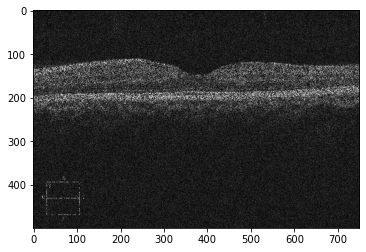

Iteration 51:	Reconstruction Error: 8281.83	Spectral Norm W: 208535.60	Sparisty of W: 141037.31
Iteration 101:	Reconstruction Error: 7696.05	Spectral Norm W: 209329.46	Sparisty of W: 146174.25
Iteration 151:	Reconstruction Error: 7714.57	Spectral Norm W: 210891.32	Sparisty of W: 146762.27
Iteration 201:	Reconstruction Error: 7727.58	Spectral Norm W: 211451.71	Sparisty of W: 146911.50
Iteration 251:	Reconstruction Error: 7733.70	Spectral Norm W: 211685.15	Sparisty of W: 146964.93
Resulting Reconstruction after 250 interations:


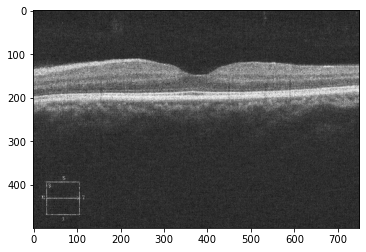

Iteration 301:	Reconstruction Error: 7736.78	Spectral Norm W: 211795.26	Sparisty of W: 146986.06
Iteration 351:	Reconstruction Error: 7738.41	Spectral Norm W: 211851.57	Sparisty of W: 146995.17
Iteration 401:	Reconstruction Error: 7739.32	Spectral Norm W: 211881.95	Sparisty of W: 146999.33
Iteration 451:	Reconstruction Error: 7739.84	Spectral Norm W: 211899.20	Sparisty of W: 147001.45
Iteration 501:	Reconstruction Error: 7740.16	Spectral Norm W: 211909.39	Sparisty of W: 147002.58
Resulting Reconstruction after 500 interations:


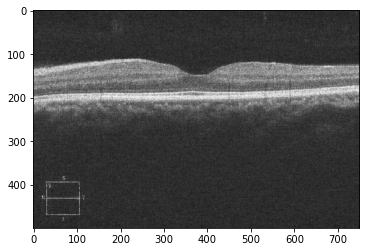

Iteration 551:	Reconstruction Error: 7740.35	Spectral Norm W: 211915.56	Sparisty of W: 147003.22
Iteration 601:	Reconstruction Error: 7740.47	Spectral Norm W: 211919.38	Sparisty of W: 147003.61
Iteration 651:	Reconstruction Error: 7740.55	Spectral Norm W: 211921.79	Sparisty of W: 147003.83
Iteration 701:	Reconstruction Error: 7740.60	Spectral Norm W: 211923.34	Sparisty of W: 147003.96
Iteration 751:	Reconstruction Error: 7740.63	Spectral Norm W: 211924.35	Sparisty of W: 147004.05
Resulting Reconstruction after 750 interations:


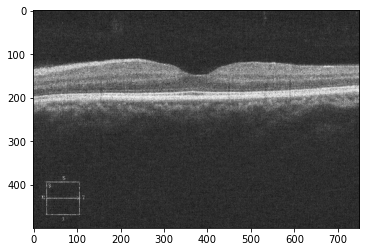

Iteration 801:	Reconstruction Error: 7740.65	Spectral Norm W: 211925.00	Sparisty of W: 147004.10
Iteration 851:	Reconstruction Error: 7740.67	Spectral Norm W: 211925.44	Sparisty of W: 147004.13
Iteration 901:	Reconstruction Error: 7740.68	Spectral Norm W: 211925.73	Sparisty of W: 147004.16
Iteration 951:	Reconstruction Error: 7740.68	Spectral Norm W: 211925.92	Sparisty of W: 147004.17
Iteration 1001:	Reconstruction Error: 7740.69	Spectral Norm W: 211926.05	Sparisty of W: 147004.18
Resulting Reconstruction after 1000 interations:


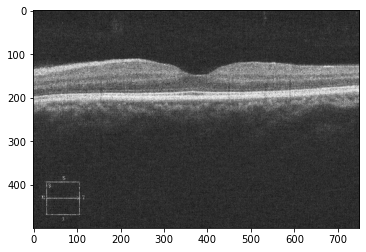

Iteration 1051:	Reconstruction Error: 7740.69	Spectral Norm W: 211926.14	Sparisty of W: 147004.19
Iteration 1101:	Reconstruction Error: 7740.69	Spectral Norm W: 211926.21	Sparisty of W: 147004.19
Iteration 1151:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.25	Sparisty of W: 147004.20
Iteration 1201:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.28	Sparisty of W: 147004.20
Iteration 1251:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.30	Sparisty of W: 147004.20
Resulting Reconstruction after 1250 interations:


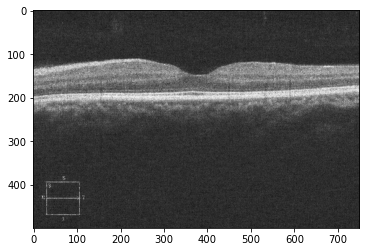

Iteration 1301:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.31	Sparisty of W: 147004.20
Iteration 1351:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.32	Sparisty of W: 147004.20
Iteration 1401:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.33	Sparisty of W: 147004.20
Iteration 1451:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.33	Sparisty of W: 147004.20
Iteration 1501:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 1500 interations:


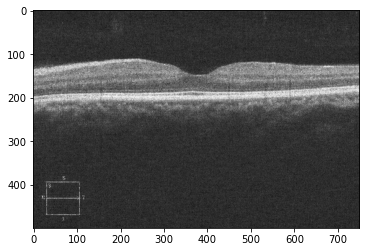

Iteration 1551:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1601:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1651:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1701:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1751:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 1750 interations:


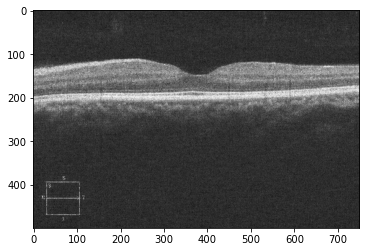

Iteration 1801:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1851:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1901:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1951:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2001:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 2000 interations:


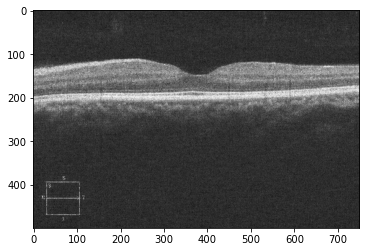

Iteration 2051:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2101:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2151:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2201:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2251:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 2250 interations:


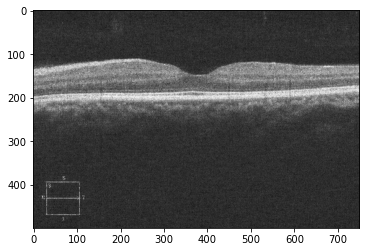

Iteration 2301:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2351:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2401:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2451:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2501:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 2500 interations:


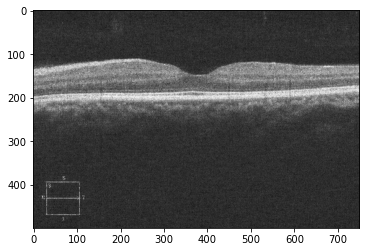

Iteration 2551:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2601:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2651:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2701:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2751:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 2750 interations:


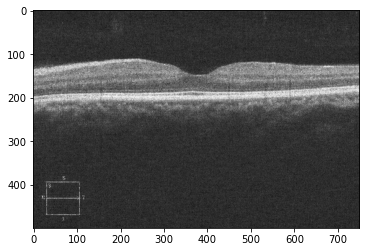

Iteration 2801:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2851:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2901:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2951:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20


 Final Reconstruction


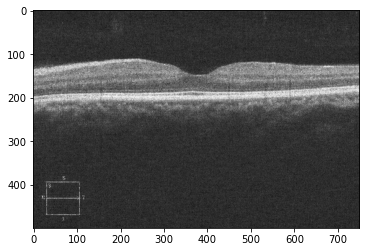

In [148]:
W_ = np.linalg.inv(B1) @ D @ np.linalg.inv(B2t)

reconstruction_error_l1 = []
spectral_norm_l1 = []
sparsity_l1 = []

iters = 3000
for i in range(iters):
    W_ = Update1(mask, B1, B2t, W_, D, a)
    W_ = SoftThresh(W_, tau)
    
    spectral_norm_l1.append(np.linalg.norm(W_, ord="nuc"))
    sparsity_l1.append(np.linalg.norm(W_, ord=1))
    reconstruction_error_l1.append(np.linalg.norm(X - B1 @ W_ @ B2t))
    if i % 50 == 0:
        print(
            f"Iteration {i+1}:\t"\
            f"Reconstruction Error: {reconstruction_error_l1[-1]:.2f}\t"\
            f"Spectral Norm W: {spectral_norm_l1[-1]:.2f}\t"\
            f"Sparisty of W: {sparsity_l1[-1]:.2f}"
        )
    if i % 250 == 0:
        print(f"Resulting Reconstruction after {i} interations:")
        plt.imshow(B1 @ W_ @ B2t, cmap="gray")
        display.display(plt.gcf())
        
print("\n\n Final Reconstruction")
plt.imshow(B1 @ W_ @ B2t, cmap="gray");

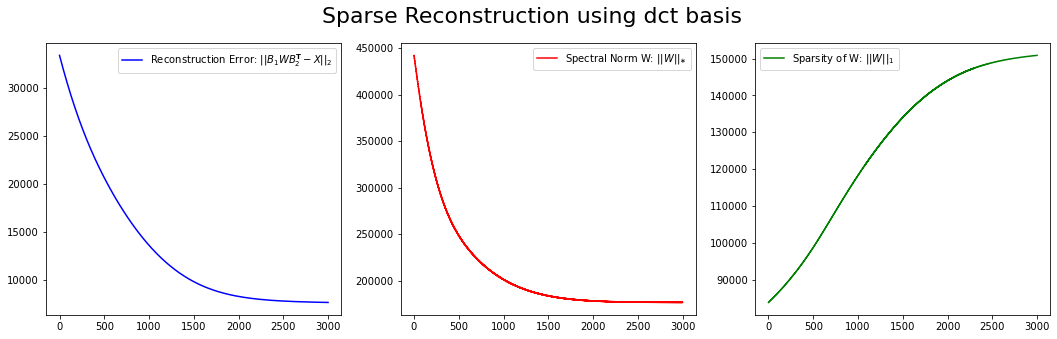

In [169]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

axes[0].plot(reconstruction_error_l1, c='b', label=r"Reconstruction Error: $||B_{1} W B_{2}^{\mathbf{T}} - X ||_{2}$")
axes[1].plot(spectral_norm_l1, c='r', label=r"Spectral Norm W: $|| W ||_{\ast}$")
axes[2].plot(sparsity_l1, c='g', label=r"Sparsity of W: $|| W ||_{1}$")

axes[0].legend()
axes[1].legend()
axes[2].legend()

fig.suptitle(f"Sparse Reconstruction using {basis_} basis", fontsize=22)

plt.show()

Iteration 1:	Reconstruction Error: 33406.63	Spectral Norm W: 442020.20	Sparisty of W: 83786.87
Resulting Reconstruction after 0 interations:


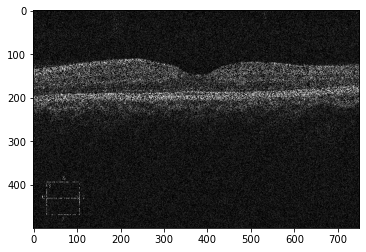

Iteration 51:	Reconstruction Error: 31687.15	Spectral Norm W: 407218.82	Sparisty of W: 84994.94
Iteration 101:	Reconstruction Error: 30083.45	Spectral Norm W: 376096.94	Sparisty of W: 86232.72
Iteration 151:	Reconstruction Error: 28592.88	Spectral Norm W: 349447.72	Sparisty of W: 87543.85
Iteration 201:	Reconstruction Error: 27207.93	Spectral Norm W: 326850.06	Sparisty of W: 88925.67
Iteration 251:	Reconstruction Error: 25921.13	Spectral Norm W: 307702.10	Sparisty of W: 90385.44
Resulting Reconstruction after 250 interations:


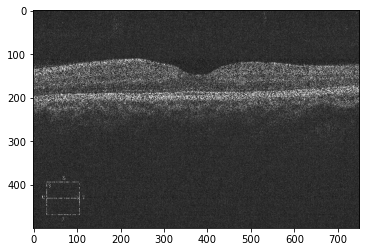

Iteration 301:	Reconstruction Error: 24724.09	Spectral Norm W: 291538.83	Sparisty of W: 91892.77
Iteration 351:	Reconstruction Error: 23607.85	Spectral Norm W: 277929.84	Sparisty of W: 93481.63
Iteration 401:	Reconstruction Error: 22563.10	Spectral Norm W: 266458.68	Sparisty of W: 95149.60
Iteration 451:	Reconstruction Error: 21581.06	Spectral Norm W: 256722.65	Sparisty of W: 96892.53
Iteration 501:	Reconstruction Error: 20654.07	Spectral Norm W: 248364.21	Sparisty of W: 98716.77
Resulting Reconstruction after 500 interations:


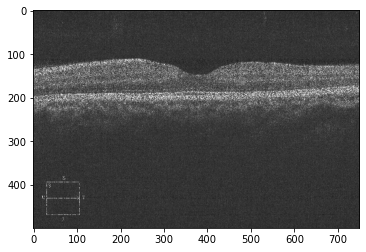

Iteration 551:	Reconstruction Error: 19775.87	Spectral Norm W: 241085.59	Sparisty of W: 100609.17
Iteration 601:	Reconstruction Error: 18941.84	Spectral Norm W: 234657.11	Sparisty of W: 102568.37
Iteration 651:	Reconstruction Error: 18148.69	Spectral Norm W: 228913.26	Sparisty of W: 104557.41
Iteration 701:	Reconstruction Error: 17394.14	Spectral Norm W: 223739.39	Sparisty of W: 106566.78
Iteration 751:	Reconstruction Error: 16676.61	Spectral Norm W: 219049.82	Sparisty of W: 108581.29
Resulting Reconstruction after 750 interations:


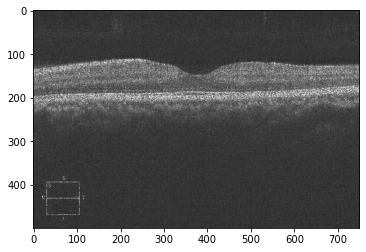

Iteration 801:	Reconstruction Error: 15995.04	Spectral Norm W: 214785.99	Sparisty of W: 110586.13
Iteration 851:	Reconstruction Error: 15348.61	Spectral Norm W: 210902.25	Sparisty of W: 112565.25
Iteration 901:	Reconstruction Error: 14736.66	Spectral Norm W: 207363.61	Sparisty of W: 114514.03
Iteration 951:	Reconstruction Error: 14158.59	Spectral Norm W: 204140.45	Sparisty of W: 116417.79
Iteration 1001:	Reconstruction Error: 13613.80	Spectral Norm W: 201208.19	Sparisty of W: 118277.02
Resulting Reconstruction after 1000 interations:


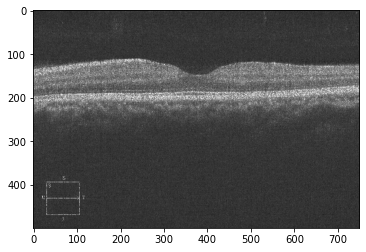

Iteration 1051:	Reconstruction Error: 13101.66	Spectral Norm W: 198544.48	Sparisty of W: 120089.63
Iteration 1101:	Reconstruction Error: 12621.49	Spectral Norm W: 196129.25	Sparisty of W: 121852.05
Iteration 1151:	Reconstruction Error: 12172.54	Spectral Norm W: 193943.53	Sparisty of W: 123563.41
Iteration 1201:	Reconstruction Error: 11753.98	Spectral Norm W: 191970.00	Sparisty of W: 125218.82
Iteration 1251:	Reconstruction Error: 11364.95	Spectral Norm W: 190191.56	Sparisty of W: 126821.25
Resulting Reconstruction after 1250 interations:


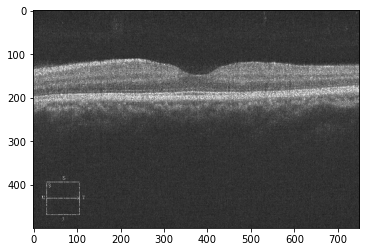

Iteration 1301:	Reconstruction Error: 11004.47	Spectral Norm W: 188593.10	Sparisty of W: 128370.20
Iteration 1351:	Reconstruction Error: 10671.53	Spectral Norm W: 187159.37	Sparisty of W: 129862.07
Iteration 1401:	Reconstruction Error: 10365.02	Spectral Norm W: 185876.74	Sparisty of W: 131303.96
Iteration 1451:	Reconstruction Error: 10083.78	Spectral Norm W: 184732.15	Sparisty of W: 132688.57
Iteration 1501:	Reconstruction Error: 9826.58	Spectral Norm W: 183712.83	Sparisty of W: 134014.77
Resulting Reconstruction after 1500 interations:


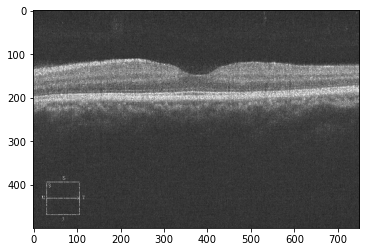

Iteration 1551:	Reconstruction Error: 9592.17	Spectral Norm W: 182807.61	Sparisty of W: 135281.33
Iteration 1601:	Reconstruction Error: 9379.23	Spectral Norm W: 182006.04	Sparisty of W: 136485.71
Iteration 1651:	Reconstruction Error: 9186.44	Spectral Norm W: 181297.86	Sparisty of W: 137626.23
Iteration 1701:	Reconstruction Error: 9012.46	Spectral Norm W: 180674.16	Sparisty of W: 138710.01
Iteration 1751:	Reconstruction Error: 8855.94	Spectral Norm W: 180126.55	Sparisty of W: 139735.66
Resulting Reconstruction after 1750 interations:


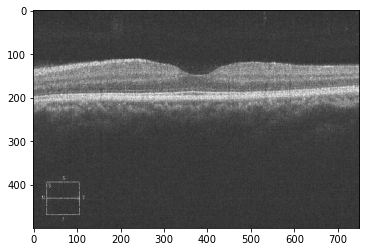

Iteration 1801:	Reconstruction Error: 8715.55	Spectral Norm W: 179647.02	Sparisty of W: 140701.75
Iteration 1851:	Reconstruction Error: 8589.97	Spectral Norm W: 179228.69	Sparisty of W: 141605.83
Iteration 1901:	Reconstruction Error: 8477.93	Spectral Norm W: 178864.80	Sparisty of W: 142452.90
Iteration 1951:	Reconstruction Error: 8378.20	Spectral Norm W: 178549.17	Sparisty of W: 143249.76
Iteration 2001:	Reconstruction Error: 8289.61	Spectral Norm W: 178276.33	Sparisty of W: 143995.26
Resulting Reconstruction after 2000 interations:


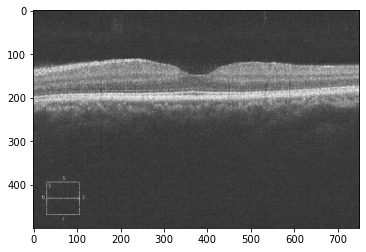

Iteration 2051:	Reconstruction Error: 8211.05	Spectral Norm W: 178041.21	Sparisty of W: 144689.74
Iteration 2101:	Reconstruction Error: 8141.49	Spectral Norm W: 177839.20	Sparisty of W: 145333.88
Iteration 2151:	Reconstruction Error: 8079.96	Spectral Norm W: 177666.11	Sparisty of W: 145926.45
Iteration 2201:	Reconstruction Error: 8025.58	Spectral Norm W: 177518.19	Sparisty of W: 146471.91
Iteration 2251:	Reconstruction Error: 7977.53	Spectral Norm W: 177392.25	Sparisty of W: 146971.87
Resulting Reconstruction after 2250 interations:


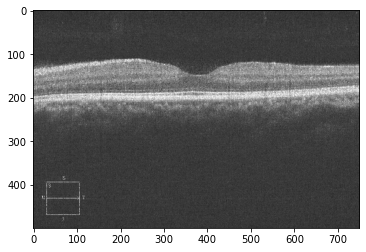

Iteration 2301:	Reconstruction Error: 7935.07	Spectral Norm W: 177284.98	Sparisty of W: 147428.30
Iteration 2351:	Reconstruction Error: 7897.55	Spectral Norm W: 177193.82	Sparisty of W: 147844.79
Iteration 2401:	Reconstruction Error: 7864.39	Spectral Norm W: 177116.48	Sparisty of W: 148224.90
Iteration 2451:	Reconstruction Error: 7835.05	Spectral Norm W: 177050.96	Sparisty of W: 148571.78
Iteration 2501:	Reconstruction Error: 7809.07	Spectral Norm W: 176995.50	Sparisty of W: 148889.15
Resulting Reconstruction after 2500 interations:


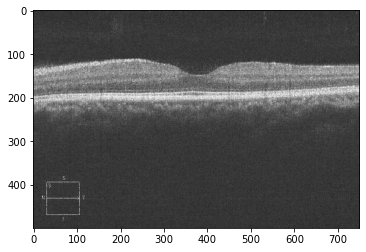

Iteration 2551:	Reconstruction Error: 7786.05	Spectral Norm W: 176948.59	Sparisty of W: 149177.94
Iteration 2601:	Reconstruction Error: 7765.62	Spectral Norm W: 176908.96	Sparisty of W: 149441.63
Iteration 2651:	Reconstruction Error: 7747.47	Spectral Norm W: 176875.56	Sparisty of W: 149682.04
Iteration 2701:	Reconstruction Error: 7731.32	Spectral Norm W: 176847.31	Sparisty of W: 149901.55
Iteration 2751:	Reconstruction Error: 7716.93	Spectral Norm W: 176823.48	Sparisty of W: 150101.99
Resulting Reconstruction after 2750 interations:


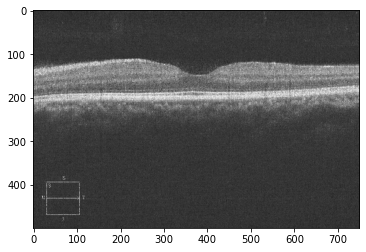

Iteration 2801:	Reconstruction Error: 7704.10	Spectral Norm W: 176803.39	Sparisty of W: 150284.84
Iteration 2851:	Reconstruction Error: 7692.63	Spectral Norm W: 176786.46	Sparisty of W: 150452.00
Iteration 2901:	Reconstruction Error: 7682.37	Spectral Norm W: 176772.22	Sparisty of W: 150605.35
Iteration 2951:	Reconstruction Error: 7673.18	Spectral Norm W: 176760.33	Sparisty of W: 150745.68


 Final Reconstruction


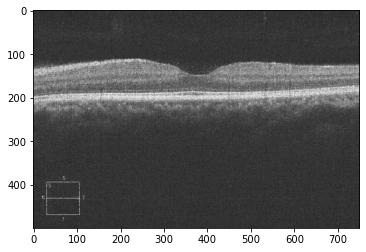

In [159]:
basis_ = "dct"

B1 = dct(np.eye(h), norm='ortho', axis=0).T
B2t = dct(np.eye(w), norm='ortho', axis=0)

W_dct = np.linalg.inv(B1) @ D @ np.linalg.inv(B2t)

reconstruction_error_l1 = []
spectral_norm_l1 = []
sparsity_l1 = []

iters = 3000
for i in range(iters):
    W_dct = Update1(mask, B1, B2t, W_dct, D, a)
    W_dct = ShrinkageOperator(W_dct, tau)
    
    spectral_norm_l1.append(np.linalg.norm(W_dct, ord="nuc"))
    sparsity_l1.append(np.linalg.norm(W_dct, ord=1))
    reconstruction_error_l1.append(np.linalg.norm(X - B1 @ W_dct @ B2t))
    if i % 50 == 0:
        print(
            f"Iteration {i+1}:\t"\
            f"Reconstruction Error: {reconstruction_error_l1[-1]:.2f}\t"\
            f"Spectral Norm W: {spectral_norm_l1[-1]:.2f}\t"\
            f"Sparisty of W: {sparsity_l1[-1]:.2f}"
        )
    if i % 250 == 0:
        print(f"Resulting Reconstruction after {i} interations:")
        plt.imshow(B1 @ W_dct @ B2t, cmap="gray")
        display.display(plt.gcf())
        
print("\n\n Final Reconstruction")
plt.imshow(B1 @ W_dct @ B2t, cmap="gray");

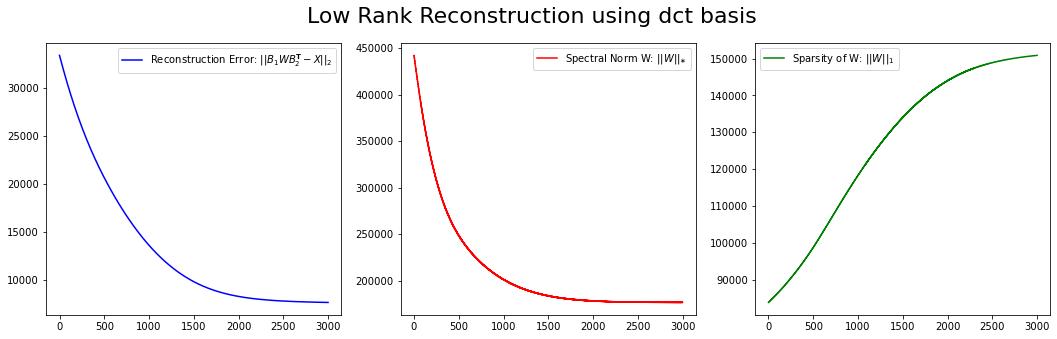

In [170]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

axes[0].plot(reconstruction_error, c='b', label=r"Reconstruction Error: $||B_{1} W B_{2}^{\mathbf{T}} - X ||_{2}$")
axes[1].plot(spectral_norm, c='r', label=r"Spectral Norm W: $|| W ||_{\ast}$")
axes[2].plot(sparsity, c='g', label=r"Sparsity of W: $|| W ||_{1}$")

axes[0].legend()
axes[1].legend()
axes[2].legend()

fig.suptitle(f"Low Rank Reconstruction using {basis_} basis", fontsize=22)

plt.show()

Iteration 1:	Reconstruction Error: 32398.47	Spectral Norm W: 415535.16	Sparisty of W: 82111.33
Resulting Reconstruction after 0 interations:


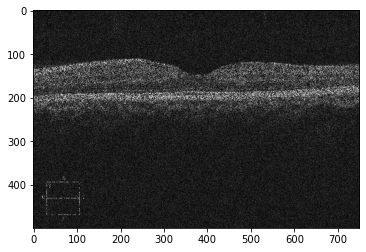

Iteration 51:	Reconstruction Error: 8281.83	Spectral Norm W: 208535.60	Sparisty of W: 141037.31
Iteration 101:	Reconstruction Error: 7696.05	Spectral Norm W: 209329.46	Sparisty of W: 146174.25
Iteration 151:	Reconstruction Error: 7714.57	Spectral Norm W: 210891.32	Sparisty of W: 146762.27
Iteration 201:	Reconstruction Error: 7727.58	Spectral Norm W: 211451.71	Sparisty of W: 146911.50
Iteration 251:	Reconstruction Error: 7733.70	Spectral Norm W: 211685.15	Sparisty of W: 146964.93
Resulting Reconstruction after 250 interations:


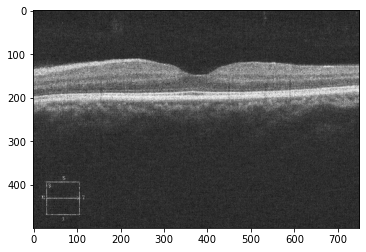

Iteration 301:	Reconstruction Error: 7736.78	Spectral Norm W: 211795.26	Sparisty of W: 146986.06
Iteration 351:	Reconstruction Error: 7738.41	Spectral Norm W: 211851.57	Sparisty of W: 146995.17
Iteration 401:	Reconstruction Error: 7739.32	Spectral Norm W: 211881.95	Sparisty of W: 146999.33
Iteration 451:	Reconstruction Error: 7739.84	Spectral Norm W: 211899.20	Sparisty of W: 147001.45
Iteration 501:	Reconstruction Error: 7740.16	Spectral Norm W: 211909.39	Sparisty of W: 147002.58
Resulting Reconstruction after 500 interations:


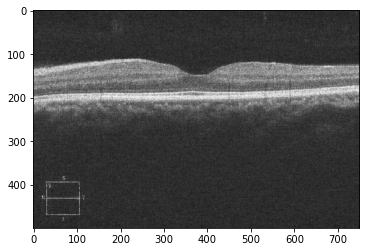

Iteration 551:	Reconstruction Error: 7740.35	Spectral Norm W: 211915.56	Sparisty of W: 147003.22
Iteration 601:	Reconstruction Error: 7740.47	Spectral Norm W: 211919.38	Sparisty of W: 147003.61
Iteration 651:	Reconstruction Error: 7740.55	Spectral Norm W: 211921.79	Sparisty of W: 147003.83
Iteration 701:	Reconstruction Error: 7740.60	Spectral Norm W: 211923.34	Sparisty of W: 147003.96
Iteration 751:	Reconstruction Error: 7740.63	Spectral Norm W: 211924.35	Sparisty of W: 147004.05
Resulting Reconstruction after 750 interations:


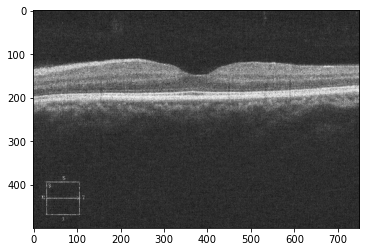

Iteration 801:	Reconstruction Error: 7740.65	Spectral Norm W: 211925.00	Sparisty of W: 147004.10
Iteration 851:	Reconstruction Error: 7740.67	Spectral Norm W: 211925.44	Sparisty of W: 147004.13
Iteration 901:	Reconstruction Error: 7740.68	Spectral Norm W: 211925.73	Sparisty of W: 147004.16
Iteration 951:	Reconstruction Error: 7740.68	Spectral Norm W: 211925.92	Sparisty of W: 147004.17
Iteration 1001:	Reconstruction Error: 7740.69	Spectral Norm W: 211926.05	Sparisty of W: 147004.18
Resulting Reconstruction after 1000 interations:


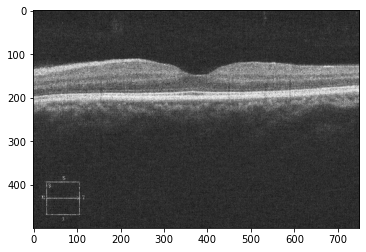

Iteration 1051:	Reconstruction Error: 7740.69	Spectral Norm W: 211926.14	Sparisty of W: 147004.19
Iteration 1101:	Reconstruction Error: 7740.69	Spectral Norm W: 211926.21	Sparisty of W: 147004.19
Iteration 1151:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.25	Sparisty of W: 147004.20
Iteration 1201:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.28	Sparisty of W: 147004.20
Iteration 1251:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.30	Sparisty of W: 147004.20
Resulting Reconstruction after 1250 interations:


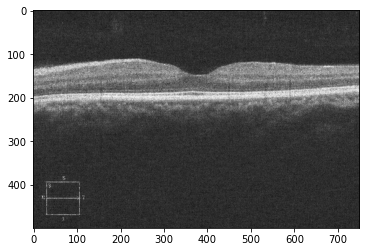

Iteration 1301:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.31	Sparisty of W: 147004.20
Iteration 1351:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.32	Sparisty of W: 147004.20
Iteration 1401:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.33	Sparisty of W: 147004.20
Iteration 1451:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.33	Sparisty of W: 147004.20
Iteration 1501:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 1500 interations:


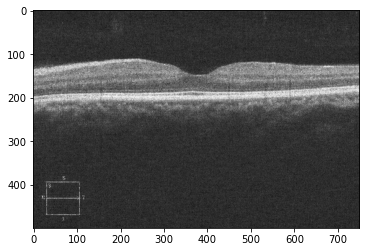

Iteration 1551:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1601:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1651:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1701:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1751:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 1750 interations:


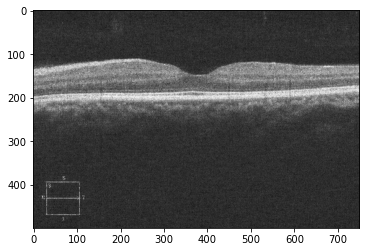

Iteration 1801:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1851:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1901:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 1951:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2001:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 2000 interations:


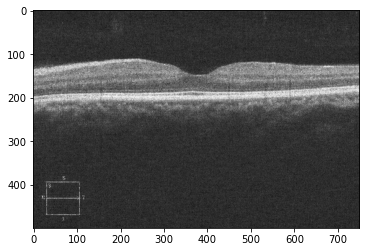

Iteration 2051:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2101:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2151:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2201:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2251:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 2250 interations:


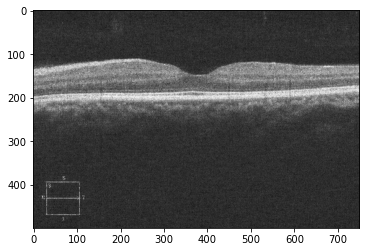

Iteration 2301:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2351:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2401:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2451:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2501:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 2500 interations:


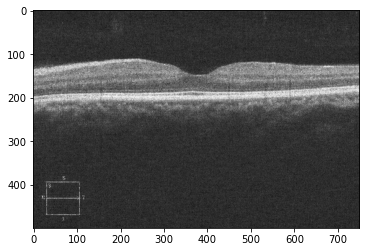

Iteration 2551:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2601:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2651:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2701:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2751:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Resulting Reconstruction after 2750 interations:


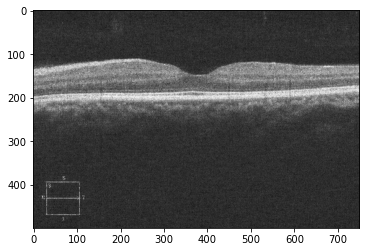

Iteration 2801:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2851:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2901:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20
Iteration 2951:	Reconstruction Error: 7740.70	Spectral Norm W: 211926.34	Sparisty of W: 147004.20


 Final Reconstruction


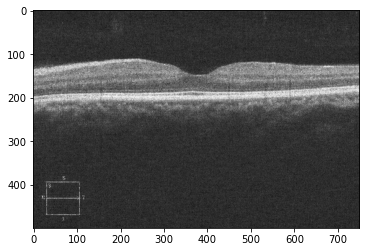

In [167]:
W_dct_spec = np.linalg.inv(B1) @ D @ np.linalg.inv(B2t)

reconstruction_error_spec = []
spectral_norm_spec = []
sparsity_spec = []

iters = 3000
for i in range(iters):
    W_dct_spec = Update1(mask, B1, B2t, W_dct_spec, D, a)
    W_dct_spec = SoftThresh(W_dct_spec, tau)
    
    spectral_norm_spec.append(np.linalg.norm(W_dct_spec, ord="nuc"))
    sparsity_spec.append(np.linalg.norm(W_dct_spec, ord=1))
    reconstruction_error_spec.append(np.linalg.norm(X - B1 @ W_dct_spec @ B2t))
    if i % 50 == 0:
        print(
            f"Iteration {i+1}:\t"\
            f"Reconstruction Error: {reconstruction_error_spec[-1]:.2f}\t"\
            f"Spectral Norm W: {spectral_norm_spec[-1]:.2f}\t"\
            f"Sparisty of W: {sparsity_spec[-1]:.2f}"
        )
    if i % 250 == 0:
        print(f"Resulting Reconstruction after {i} interations:")
        plt.imshow(B1 @ W_dct_spec @ B2t, cmap="gray")
        display.display(plt.gcf())
        
print("\n\n Final Reconstruction")
plt.imshow(B1 @ W_dct_spec @ B2t, cmap="gray");

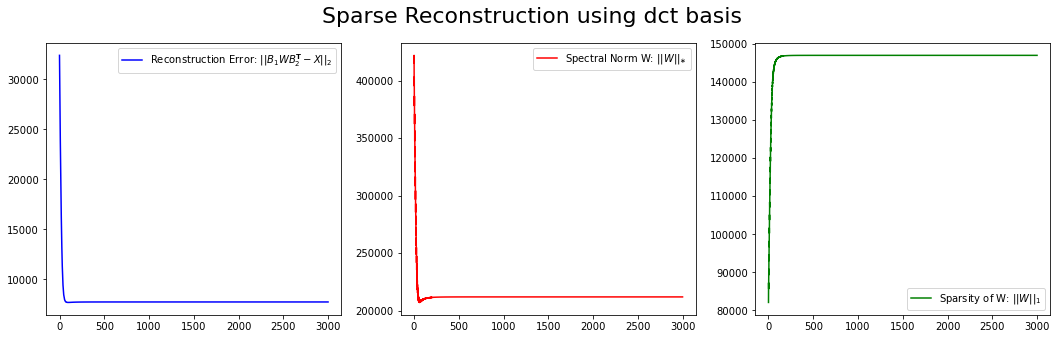

In [171]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

axes[0].plot(reconstruction_error_spec, c='b', label=r"Reconstruction Error: $||B_{1} W B_{2}^{\mathbf{T}} - X ||_{2}$")
axes[1].plot(spectral_norm_spec, c='r', label=r"Spectral Norm W: $|| W ||_{\ast}$")
axes[2].plot(sparsity_spec, c='g', label=r"Sparsity of W: $|| W ||_{1}$")

axes[0].legend()
axes[1].legend()
axes[2].legend()

fig.suptitle(f"Sparse Reconstruction using {basis_} basis", fontsize=22)

plt.show()